
# Replication Controller

- 구 버전(v1.8 이전)의 쿠버네티스에서 사용
- Pod가 항상 실행되도록 유지하는 쿠버네티스 리소스
  - 노드가 클러스터에서 사라지는 경우 해당 Pod를 감지하고 대체 Pod 생성
  - 실행 중인 Pod 목록 지속적 모니터링, 실제 Pod 수가 원하는 수와 항상 일치하는 지 확인

### Replication Controller의 세 가지 요소 

1) Label Selector: Replication Controller가 관리하는 Pod 범위를 결정(rc는 Label로 Pod를 관리하기 때문)
2) 복제본 수: 실행해야하는 Pod 수 결정
3) Pod 템플릿: Pod의 모양을 설명

### Replication Controller의 장점

- Pod가 없는 경우 새 Pod를 항상 실행
- 노드에 장애 발생 시 다른 노드에 복제본 생성
- 수동, 자동으로 Pod 수평 스케일링

### Replication Controller 명령어

* Replication 생성
```
$ kubectl create -f {Replication Controller yaml} 
```

* 생성된 Replication 확인
```
$ kubectl get rc
```

* rc의 Pod들이 어느 노드에 있는지 확인
```
$ kubectl get pod -o wide
```

* Replication Controller 삭제
```
$ kubectl delete rc {Replication Controller name}
```
 
* Replication Controller 스케일링

방법 1)
```
$ kubectl scale rc {Replication Controller name} --replicas={scale 변경 개수}
```

방법 2)
```
$ kubectl edit rc {Replication Controller name}
vim으로 파일이 열림. spec 하위의 replicas 수정
```

방법 3)
```
$ cp {기존 Replication Controller yaml} {새로운 Replication Controller yaml}
$ vi {새로운 Replication Controller yaml}
vim으로 파일이 열림. spec 하위의 replicas 수정

$ kubectl apply -f {새로운 Replication Controller yaml}
```

# Replica Set

- 쿠버네티스 1.8 버전부터 Deployment, Daemonset, ReplicaSet, SatetfulSet API가 베타로 업데이트되고, 1.9 버전부터 정식으로 업데이트 됨
- 레플리카셋은 레플리케이션컨트롤러를 완전히 대체 가능
- 일반적으로 레플리카셋을 직접 생성하지 않고 상위 수준의 디플로이먼트 리소스를 만들 때 자동으로 생성

### Replication Controller vs Replica Set

- 거의 동일하게 동작
- Replica Set이 더 풍부한 Pod selector 사용 가능
  - Replication Controller: 특정 label의 key, value가 일치하는 pod 매치
  - Replica Set: 유연한 label을 매칭하는 **matchExpressions** 사용하여 pod 매치

### Replica Set 명령어

* Replica Set 생성
```
$ kubectl create -f {Replica Set yaml}
```

* 생성된 Replica Set 확인
```
$ kubectl get rs
```

* rs 상세 조회
```
$ kubectl describe rs {Replica Set 명}
```

* rs 삭제
```
$ kubectl delete rs {Replica Set 명}
```

# Label 이란?

### 개요

* 모든 리소스를 구성하는 매우 간단하면서도 강력한 k8s 기능이다.
* 리소스에 첨부하는 임의의 key-value 쌍 값
* Label selector를 사용하면 각종 리소스를 필터링하여 선택할 수 있다.
* 리소스는 한 개 이상의 Label을 가질 수 있다.
* 리소스를 만드는 시점에 Label을 작성한다.
* 기존에 실행 중인 리소스에도 Label 값을 수정 및 추가 가능하다.

### Label을 이용한 Pod 구성

용도에 따라 Label을 구분하여 사용함  
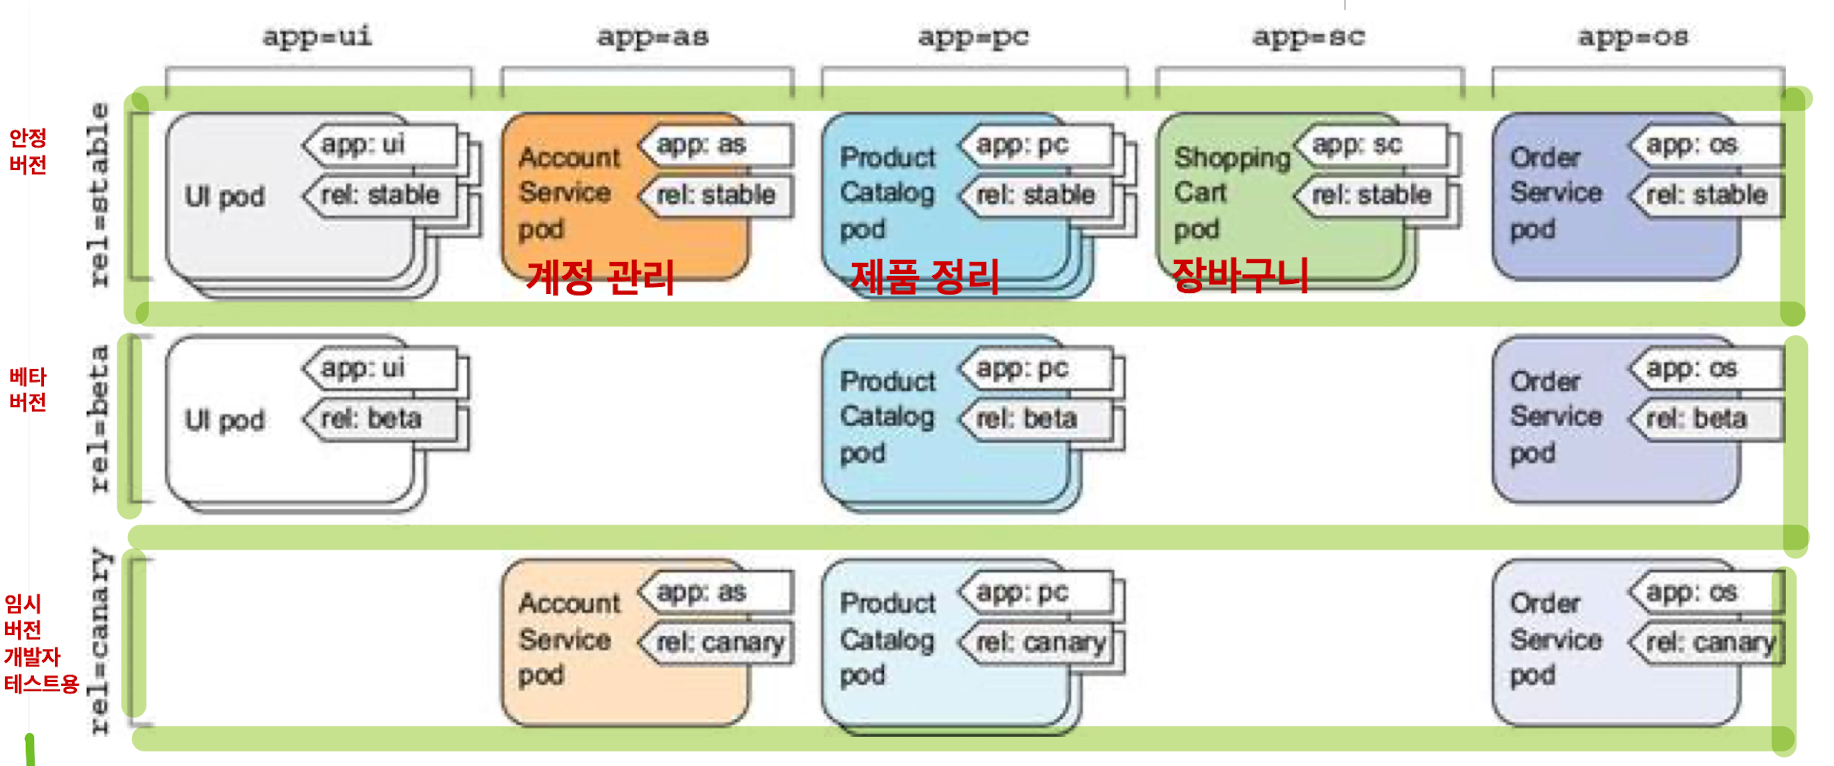
출처: 인프런

# Label 사용 방법

### Pod 생성 시 Label 지정 방법

`labels` 오브젝트에 `key:value` 형식으로 지정

> http-go-pod.yaml
```
apiVersion: v1
kind: Pod
metadata:
  name: http-go
  # label 추가
  labels:
    creation_method: manual
    env: prod
spec:
  containers:
  - name: http-go
    image: healinyoon/http-go
    ports:
    - containerPort: 8080
      protocol: TCP

```

### Label을 추가 및 수정하는 방법

* 새로운 Label을 추가할 때는 `label` 명령어 사용
```
$ kubectl label pod {Pod 명} {key}={value}
```

* 기존의 실행 중인 리소스의 Label을 수정할 때는 `--overwrite` 옵션을 주어서 실행
```
$ kubectl label pod {Pod 명} {key}={value} --overwrite
```

* Label 삭제
```
$ kubectl label pod {Pod 명} {Label key}-
```

# Label 배치 전략

확장 가능한 k8s Label 예제
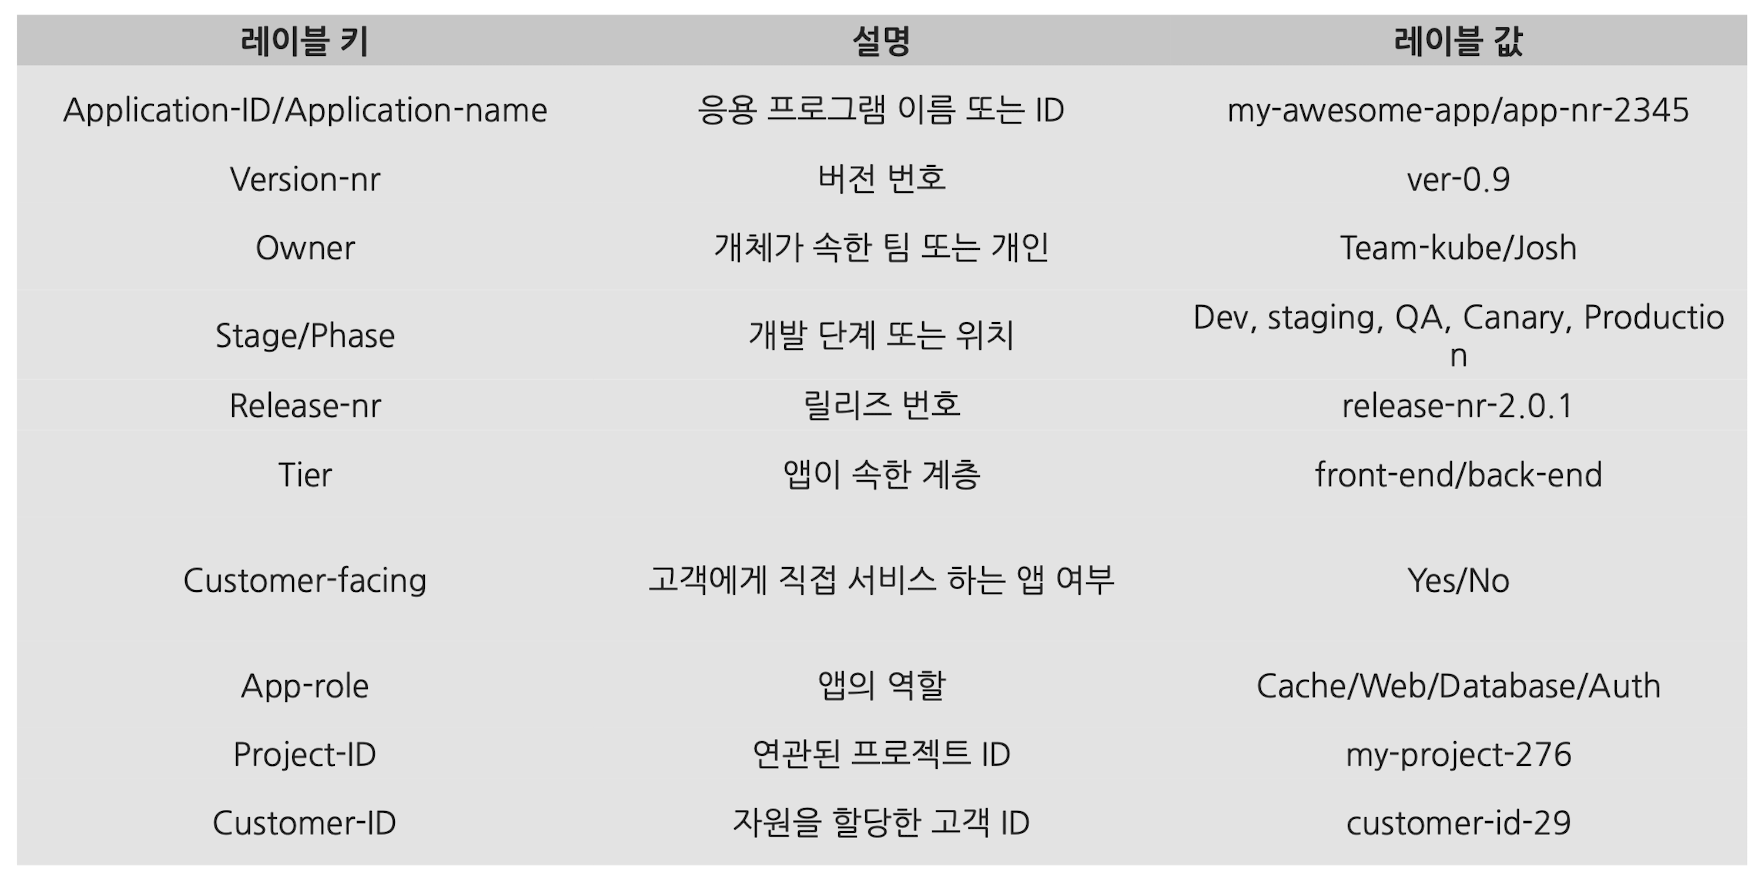 
출처: 인프런